## PCA

#### Short summary of notebook

Principal Component Analysis, PCA, is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features whilst keeping most of the original information.

not used for: 
- nonlinear distributions,
- clustered distributions.

Why use PCA?
- **Reduces training time** — due to smaller dataset
- **Removes noise** — by keeping only what’s relevant
- **Makes visualization possible** — in cases where you have a maximum of 3 principal components

#### What are principal components?

Principal components form a set of linear independent vectors, pointing into the direction of the largest variance. The corresponding eigenvalue quantifies the amount of variance in that direction of the dataset.

To plot principal components, those eigenvectors can first be normalized and than scaled by the eigenvector (or its squareroot) to indicate the amount of variance (or the standard deviation) in that direction.


#### Pseudo Code

Step 1: Calculate the Correlation matrix data consisting of n dimensions. 
				The Correlation matrix will be of shape n*n.

Step 2: Calculate the Eigenvectors and Eigenvalues of this matrix.

Step 3: Take the first k-eigenvectors with the highest eigenvalues.

Step 4: Project the original dataset into these k eigenvectors resulting 
				in k dimensions where k ≤ n.

source: https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d

Imports

In [3]:
import pandas as pd
import numpy as np
import os

loading datasets

In [24]:
online = True

if online:
    df_merged = pd.read_csv('https://raw.githubusercontent.com/juelha/NeuroFuzzySystem/main/data/df_merged.csv?token=GHSAT0AAAAAABOICJN34V5BW7H75S4Z52XYYTAEW3A')


    df_merged_aug = pd.read_csv('https://raw.githubusercontent.com/juelha/NeuroFuzzySystem/main/data/df_merged_aug.csv?token=GHSAT0AAAAAABOICJN3HSNKBVZBRHUQBJSIYTAEXJQ')

else:
    # import original and augmented citrus data sets
    # get save path 
    file_name = 'df_merged' + '.csv'
    file_name_aug = 'df_merged' + '.csv'
    save_path = os.path.dirname(__file__) +  '/../data'
    full_path = os.path.join(save_path, file_name)
    full_path_aug = os.path.join(save_path, file_name_aug)

    assert  os.path.exists(full_path), f'File {file_name} is not downloaded to correct folder'
    assert  os.path.exists(full_path_aug), f'File {file_name_aug} is not downloaded to correct folder'

    df_merged = pd.read_csv(full_path)
    df_merged_aug = pd.read_csv(full_path_aug)

df = df_merged
df.pop('region')
#df_merged_features.pop('season')
print(df)
cols =  df.columns

     season  N (%)  P (%)  K (%)  Ca (%)  Mg (%)  yield
0      2014   2.60   0.14   1.06    3.79    0.61    0.0
1      2017   3.10   0.16   1.13    4.69    0.92    0.0
2      2018   2.44   0.15   1.62    3.52    0.61    0.0
3      2016   2.01   0.15   1.10    5.01    0.61    0.0
4      2015   2.18   0.18   1.34    4.40    0.50    0.0
..      ...    ...    ...    ...     ...     ...    ...
619    2017   2.15   0.13   1.04    5.47    0.29    0.0
620    2016   2.02   0.15   1.99    4.12    0.32    0.0
621    2017   1.94   0.15   0.98    5.50    0.29    1.0
622    2016   3.20   0.14   1.28    5.47    0.39    1.0
623    2017   2.25   0.12   0.91    5.12    0.47    0.0

[624 rows x 7 columns]


Standarize X in respect to its features, compute cov matrix & compute eigenvalues

In [17]:
# standarize the data respecting its features
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
print("cars_scaled", df_merged[:5])

# Compute the covariance matrix and store it into covar
features = df.T
#print("features", features[:5])

covar = np.cov(features)
print("covar", covar[:5])

#assert covar.shape == (5, 11)

# Compute the eigenvalues and eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
eigenval, eigenvec = np.linalg.eig(covar)
print(eigenval[:5])
print(eigenvec[:5])

#assert eigenval.shape == (11,)
#assert eigenvec.shape == (11, 11)
for ev in eigenvec: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

cars_scaled    season  N (%)  P (%)  K (%)  Ca (%)  Mg (%)  yield
0    2014   2.60   0.14   1.06    3.79    0.61    0.0
1    2017   3.10   0.16   1.13    4.69    0.92    0.0
2    2018   2.44   0.15   1.62    3.52    0.61    0.0
3    2016   2.01   0.15   1.10    5.01    0.61    0.0
4    2015   2.18   0.18   1.34    4.40    0.50    0.0
covar [[ 1.00160514  0.00238717  0.23599577  0.24769582 -0.05020284 -0.10429307
  -0.12364699]
 [ 0.00238717  1.00160514  0.01670148  0.02275646 -0.01932426  0.00338271
  -0.03160963]
 [ 0.23599577  0.01670148  1.00160514  0.54078143  0.03599503  0.109769
  -0.13071169]
 [ 0.24769582  0.02275646  0.54078143  1.00160514 -0.37037606 -0.1916465
  -0.03956267]
 [-0.05020284 -0.01932426  0.03599503 -0.37037606  1.00160514  0.29691662
  -0.03418775]]
[1.85084357 1.41007444 0.31789857 0.63709848 0.86129016]
[[ 3.88798557e-01  1.65803581e-01 -7.04904144e-03  4.04768689e-01
   6.88767324e-01  4.21212301e-01  7.50815933e-02]
 [ 3.91527754e-02  3.39651311e-02 -7.7970

(array([0.9466399 , 0.56955466, 0.05175757, 0.03497318]),
 array([0.        , 0.28571429, 0.57142857, 0.85714286]),
 <matplotlib.lines.Line2D at 0x7f0a452dc520>)

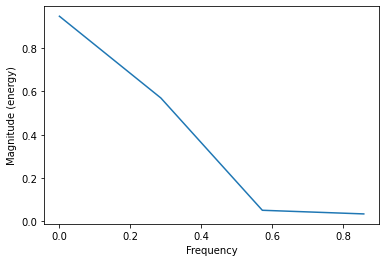

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# sort eigenval by mag in descending order
eigenval[::-1].sort()

# plot eigenvalues
plt.magnitude_spectrum(eigenval) 

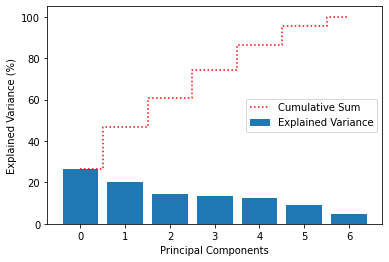

In [28]:
var_exp = [val*100/sum(eigenval) for val in eigenval]
cum_sum = np.cumsum(var_exp)

plt.bar(range(len(eigenval)), var_exp, label='Explained Variance')
plt.step(range(len(eigenval)), cum_sum, 'r:',
         where='mid', label='Cumulative Sum')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.legend(loc='center right')


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt


projected_1 = df.dot(eigenvec.T[0])
projected_2 = df.dot(eigenvec.T[1])
proj = pd.DataFrame(projected_1, columns=["PC1"])
#proj["ID"] = proj.index 
proj["PC2"] = projected_2
print(proj.index) #  has 97 dpoints


# Plot projected data
plt.title('Data Projected Onto First two Principal Components')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))
plt.scatter(proj["PC1"], proj["PC2"], alpha=.4) # accessing via PC? directly
# plt.scatter(proj[:,0], proj[:,1], alpha=.4) # throws error

# Plot the PC Vectors
# Project them and scale them by the standard deviation.
eigenvec_p = eigenvec.T @ eigenvec * np.sqrt(eigenval)
origin = np.mean(proj, axis=0)

plt.quiver(*origin, eigenvec_p[0,0], eigenvec_p[0,1], angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, eigenvec_p[1,0], eigenvec_p[1,1], angles='xy', scale_units='xy', scale=1)


plt.text(-12,-17.5, 'PC1')
plt.text(-18,-15, 'PC2')

RangeIndex(start=0, stop=624, step=1)


Text(-18, -15, 'PC2')

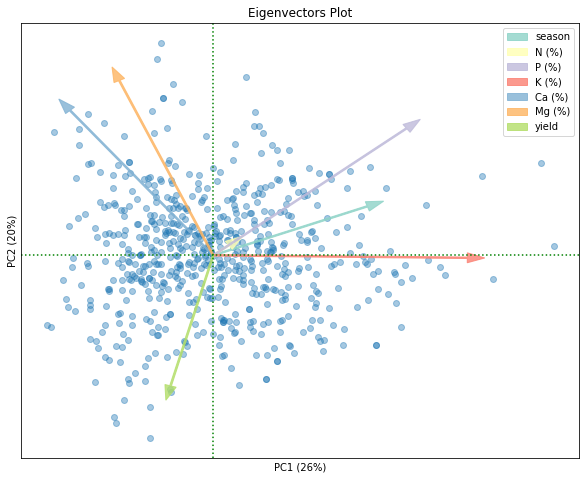

In [25]:
# same without error
# Set the plot

plt.figure(figsize=(10,8))

plt.title('Eigenvectors Plot')
plt.axhline(0, color='green', linestyle=':')
plt.axvline(0, color='green', linestyle=':')
plt.xticks([])
plt.yticks([])
plt.xlabel('PC1 ({}%)'.format(round(var_exp[0])))
plt.ylabel('PC2 ({}%)'.format(round(var_exp[1])))


# plot centered projected data
proj = proj - np.mean(proj, axis=0)

plt.scatter(proj["PC1"], proj["PC2"], alpha=.4) # accessing via PC? directly

# scale eigenvectors
eigenvec_s = eigenvec * np.sqrt(eigenval)

# Plot the eigenvector and add the labels
for idx, eivec in enumerate(eigenvec_s[:,:2]):
    plt.arrow(0, 0, eivec[0]*5, eivec[1]*5, alpha=.8, 
              color=plt.get_cmap('Set3')(idx), 
              width=0.03, head_width=.2, label= df.columns[idx])   

plt.legend()

plt.show()

## Conclusion